In [1]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import numpy as np 
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.holtwinters import Holt 
from statsmodels.tsa.seasonal import seasonal_decompose

In [3]:
data = pd.read_excel("CocaCola_Sales_Rawdata.xlsx")
data.head()

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Quarter  42 non-null     object 
 1   Sales    42 non-null     float64
dtypes: float64(1), object(1)
memory usage: 800.0+ bytes


In [5]:
data.tail()

,Quarter,Sales
37,Q2_95,4936.0
38,Q3_95,4895.0
39,Q4_95,4333.0
40,Q1_96,4194.0
41,Q2_96,5253.0


In [6]:
data.shape

(42, 2)

In [7]:
data.describe()

,Sales
count,42.000000
mean,2994.353308
std,977.930896
min,1547.818996
25%,2159.714247
50%,2782.376999
75%,3609.250000
max,5253.000000


C:\Users\suraj\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sales'>

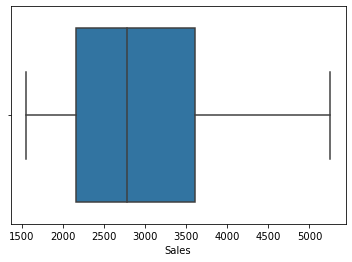

In [10]:
sns.boxplot("Sales",data=data)

<AxesSubplot:>

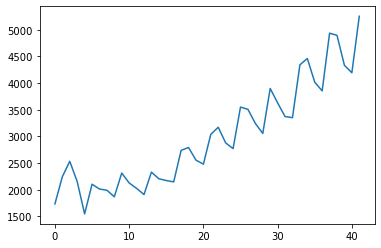

In [11]:
data.Sales.plot()

In [13]:
quarter = ['Q1', 'Q2', 'Q3', 'Q4']
n= data['Quarter'][0]
n[0:2]
data['quarter']=0

In [14]:
for i in range(42):
  n=data['Quarter'][i]
  data['quarter'][i]=n[0:2]

C:\Users\suraj\AppData\Local\Temp/ipykernel_6116/1347245954.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['quarter'][i]=n[0:2]
C:\Users\suraj\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [15]:
dummy = pd.DataFrame(pd.get_dummies(data['quarter']))

In [17]:
data= pd.concat((data, dummy), axis=1)

In [18]:
data.head(10)

,Quarter,Sales,quarter,Q1,Q2,Q3,Q4
0,Q1_86,1734.827000,Q1,1,0,0,0
1,Q2_86,2244.960999,Q2,0,1,0,0
2,Q3_86,2533.804993,Q3,0,0,1,0
3,Q4_86,2154.962997,Q4,0,0,0,1
4,Q1_87,1547.818996,Q1,1,0,0,0
5,Q2_87,2104.411995,Q2,0,1,0,0
6,Q3_87,2014.362999,Q3,0,0,1,0
7,Q4_87,1991.746998,Q4,0,0,0,1
8,Q1_88,1869.049999,Q1,1,0,0,0
9,Q2_88,2313.631996,Q2,0,1,0,0


In [19]:
t = np.arange(1,43)

In [20]:
t

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42])

In [21]:
data['t']=t
data['t_square']=data['t']*data['t']
log_Sales = np.log(data['Sales'])
data['log_Sales']=log_Sales
train = data.head(38)
test=data.tail(4)

In [22]:
data

,Quarter,Sales,quarter,Q1,Q2,Q3,Q4,t,t_square,log_Sales
0,Q1_86,1734.827000,Q1,1,0,0,0,1,1,7.458663
1,Q2_86,2244.960999,Q2,0,1,0,0,2,4,7.716443
2,Q3_86,2533.804993,Q3,0,0,1,0,3,9,7.837477
3,Q4_86,2154.962997,Q4,0,0,0,1,4,16,7.675529
4,Q1_87,1547.818996,Q1,1,0,0,0,5,25,7.344602
5,Q2_87,2104.411995,Q2,0,1,0,0,6,36,7.651791
6,Q3_87,2014.362999,Q3,0,0,1,0,7,49,7.608058
7,Q4_87,1991.746998,Q4,0,0,0,1,8,64,7.596767
8,Q1_88,1869.049999,Q1,1,0,0,0,9,81,7.533186
9,Q2_88,2313.631996,Q2,0,1,0,0,10,100,7.746574


In [23]:
import statsmodels.formula.api as smf
linear_model = smf.ols("Sales~t", data= train).fit()
pred_linear = pd.Series(linear_model.predict(pd.DataFrame(test['t'])))
rmse_linear = np.sqrt(np.mean((np.array(test['Sales']) - np.array(pred_linear))**2))
rmse_linear

591.553295722396

In [24]:
exp = smf.ols('log_Sales~t', data = train).fit()
pred_exp = pd.Series(exp.predict(pd.DataFrame(test['t'])))
rmse_exp = np.sqrt(np.mean((np.array(test['Sales'])-np.array(np.exp(pred_exp)))**2))
rmse_exp


466.24797310672255

In [25]:
quad = smf.ols('Sales~t+t_square', data= train).fit()
pred_quad = pd.Series(quad.predict(pd.DataFrame(test[['t','t_square']])))
rmse_quad = np.sqrt(np.mean((np.array(test['Sales'])-np.array(pred_quad))**2))
rmse_quad

475.56183518315254

In [26]:
add_sea = smf.ols('Sales~Q1+Q2+Q3+Q4', data = train).fit()
pred_add_sea = pd.Series(add_sea.predict(test[['Q1','Q2','Q3','Q4']]))
rmse_add_sea =  np.sqrt(np.mean((np.array(test['Sales']) - np.array(pred_add_sea))**2))
rmse_add_sea

1860.0238154547278

In [27]:
add_sea_Quad = smf.ols('Sales~t+t_square+Q1+Q2+Q3+Q4', data = train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(test[['Q1','Q2','Q3','Q4','t','t_square']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(test['Sales'])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad

301.7380071935301

In [28]:
Mul_sea = smf.ols('log_Sales~Q1+Q2+Q3+Q4',data = train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(test))
rmse_Mult_sea = np.sqrt(np.mean((np.array(test['Sales'])-np.array(np.exp(pred_Mult_sea)))**2))
rmse_Mult_sea

1963.389640077973

In [29]:
Mul_Add_sea = smf.ols('log_Sales~t+Q1+Q2+Q3+Q4', data = train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(test))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(test['Sales'])-np.array(np.exp(pred_Mult_add_sea)))**2))
rmse_Mult_add_sea

225.52439049826944

In [30]:
models = {'Model': pd.Series(["rmse_linear","rmse_exp","rmse_quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea"]), 'RMSE_Values': pd.Series([rmse_linear,rmse_exp,rmse_quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea])}
table_rmse = pd.DataFrame(models)
table_rmse

,Model,RMSE_Values
0,rmse_linear,591.553296
1,rmse_exp,466.247973
2,rmse_quad,475.561835
3,rmse_add_sea,1860.023815
4,rmse_add_sea_quad,301.738007
5,rmse_Mult_sea,1963.389640
6,rmse_Mult_add_sea,225.524390


In [31]:
predict_data = data
predict_data

,Quarter,Sales,quarter,Q1,Q2,Q3,Q4,t,t_square,log_Sales
0,Q1_86,1734.827000,Q1,1,0,0,0,1,1,7.458663
1,Q2_86,2244.960999,Q2,0,1,0,0,2,4,7.716443
2,Q3_86,2533.804993,Q3,0,0,1,0,3,9,7.837477
3,Q4_86,2154.962997,Q4,0,0,0,1,4,16,7.675529
4,Q1_87,1547.818996,Q1,1,0,0,0,5,25,7.344602
5,Q2_87,2104.411995,Q2,0,1,0,0,6,36,7.651791
6,Q3_87,2014.362999,Q3,0,0,1,0,7,49,7.608058
7,Q4_87,1991.746998,Q4,0,0,0,1,8,64,7.596767
8,Q1_88,1869.049999,Q1,1,0,0,0,9,81,7.533186
9,Q2_88,2313.631996,Q2,0,1,0,0,10,100,7.746574


In [32]:
model = smf.ols('Sales~t+t_square+Q1+Q2+Q3+Q4', data = data).fit()

In [33]:
pred_new = pd.Series(Mul_Add_sea.predict(predict_data))
pred_new

0     7.345823
1     7.587884
2     7.574280
3     7.498859
4     7.440236
5     7.682297
6     7.668693
7     7.593272
8     7.534649
9     7.776710
10    7.763106
11    7.687685
12    7.629062
13    7.871123
14    7.857519
15    7.782098
16    7.723475
17    7.965536
18    7.951932
19    7.876511
20    7.817889
21    8.059949
22    8.046345
23    7.970924
24    7.912302
25    8.154362
26    8.140758
27    8.065338
28    8.006715
29    8.248776
30    8.235171
31    8.159751
32    8.101128
33    8.343189
34    8.329584
35    8.254164
36    8.195541
37    8.437602
38    8.423998
39    8.348577
40    8.289954
41    8.532015
dtype: float64

In [34]:
predicted = np.exp(pred_new)
predicted

0     1549.709886
1     1974.131516
2     1947.457062
3     1805.980615
4     1703.152319
5     2169.597484
6     2140.281894
7     1984.797349
8     1871.787647
9     2384.417251
10    2352.199018
11    2181.319380
12    2057.120175
13    2620.507108
14    2585.098830
15    2397.299775
16    2260.803153
17    2879.973083
18    2841.058902
19    2634.665177
20    2484.653527
21    3165.129731
22    3122.362515
23    2895.532994
24    2730.668143
25    3478.520780
26    3431.519026
27    3182.230286
28    3001.041564
29    3822.941821
30    3771.286251
31    3497.314523
32    3298.185645
33    4201.465247
34    4144.695070
35    3843.596401
36    3624.751045
37    4617.467658
38    4555.076459
39    4224.164912
40    3983.650879
41    5074.659987
dtype: float64

In [35]:
predict_data['Forecasted_passengers'] = pd.Series(predicted)

In [36]:
predict_data

,Quarter,Sales,quarter,Q1,Q2,Q3,Q4,t,t_square,log_Sales,Forecasted_passengers
0,Q1_86,1734.827000,Q1,1,0,0,0,1,1,7.458663,1549.709886
1,Q2_86,2244.960999,Q2,0,1,0,0,2,4,7.716443,1974.131516
2,Q3_86,2533.804993,Q3,0,0,1,0,3,9,7.837477,1947.457062
3,Q4_86,2154.962997,Q4,0,0,0,1,4,16,7.675529,1805.980615
4,Q1_87,1547.818996,Q1,1,0,0,0,5,25,7.344602,1703.152319
5,Q2_87,2104.411995,Q2,0,1,0,0,6,36,7.651791,2169.597484
6,Q3_87,2014.362999,Q3,0,0,1,0,7,49,7.608058,2140.281894
7,Q4_87,1991.746998,Q4,0,0,0,1,8,64,7.596767,1984.797349
8,Q1_88,1869.049999,Q1,1,0,0,0,9,81,7.533186,1871.787647
9,Q2_88,2313.631996,Q2,0,1,0,0,10,100,7.746574,2384.417251
